# imports

In [1]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# data

In [2]:
generator_path = '../../Simulations/elemental_scan/gen/' 
trials = generator_path+'trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

,6000,1001,14000,8016,name,filename,ptrac_filename
index,,,,,,,
0,-0.2700,-0.0075,-0.3092,-0.4133,concentration_C_27_Si_3092,../compute/output/mctal/concentration_C_27_Si_...,../compute/output/ptrac/concentration_C_27_Si_...
1,-0.1870,-0.0052,-0.3576,-0.4502,concentration_C_187_Si_3576,../compute/output/mctal/concentration_C_187_Si...,../compute/output/ptrac/concentration_C_187_Si...
2,-0.1150,-0.0032,-0.3996,-0.4822,concentration_C_115_Si_3996,../compute/output/mctal/concentration_C_115_Si...,../compute/output/ptrac/concentration_C_115_Si...
3,-0.0532,-0.0015,-0.4356,-0.5097,concentration_C_0532_Si_4356,../compute/output/mctal/concentration_C_0532_S...,../compute/output/ptrac/concentration_C_0532_S...
4,-0.0258,-0.0007,-0.4516,-0.5219,concentration_C_0258_Si_4516,../compute/output/mctal/concentration_C_0258_S...,../compute/output/ptrac/concentration_C_0258_S...


In [3]:
true_c_concentrations = trials['6000'].values
true_c_concentrations = np.array([float(x) for x in true_c_concentrations])
true_c_concentrations = -true_c_concentrations
true_c_concentrations = true_c_concentrations.tolist()

true_si_concentrations = trials['14000'].values
true_si_concentrations = np.array([float(x) for x in true_si_concentrations])
true_si_concentrations = -true_si_concentrations
true_si_concentrations = true_si_concentrations.tolist()

concentrations = [[si, c] for c, si in zip(true_c_concentrations, true_si_concentrations)]


In [4]:
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']

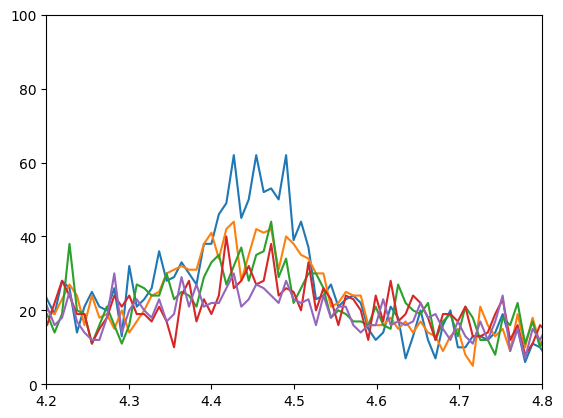

In [5]:
plt.figure()
for _, spectrum in enumerate(spectrums):
    plt.plot(bins, spectrum[0][:])
plt.xlim(4.2, 4.8)
plt.ylim(0, 100)
plt.show()

# Add Spectrums

In [6]:
Analyzer = insd.Analyzer()

In [7]:
for _, spectrum in enumerate(spectrums):
    Analyzer.addSpectrum([bins,spectrum[0]], trials['name'][_])

In [8]:
spec_labels = [i for i in Analyzer.spectrums.keys()]

In [9]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib
0,concentration_C_27_Si_3092,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 392.0, 596.0, 566.0, 685.0, 881.0,...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
1,concentration_C_187_Si_3576,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.0, 0.0, 409.0, 572.0, 574.0, 696.0, 917.00...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
2,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
3,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
4,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': None, 'Si2C1': None}","{'Si1': {'bins': None, 'baseline': None, 'peak...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False


# Calculate Peak Areas

In [10]:
regression_results = Analyzer.calcPeakAreas(spec_labels, returnFits=True, peakWindows={'Si1': [1.6, 2.2], 'Si2C1': [4.3, 4.61]}, baselineFunction='exp_falloff', peakFunction='gaussian')

/home/jac2462@uta.edu/Documents/Tools/INS-Analysis/INS_Analysis/tools/fitting_functions.py:25: RuntimeWarning: overflow encountered in exp
  return (a*np.exp(-p*(x-x0)))+b


In [11]:
regression_results.keys()

dict_keys(['concentration_C_27_Si_3092', 'concentration_C_187_Si_3576', 'concentration_C_115_Si_3996', 'concentration_C_0532_Si_4356', 'concentration_C_0258_Si_4516'])

In [12]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib
0,concentration_C_27_Si_3092,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 392.0, 596.0, 566.0, 685.0, 881.0,...","{'Si1': 6.633828335858999, 'Si2C1': 14.1226208...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
1,concentration_C_187_Si_3576,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.0, 0.0, 409.0, 572.0, 574.0, 696.0, 917.00...","{'Si1': 5.919151742855648, 'Si2C1': 9.99308943...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
2,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.761239601845876, 'Si2C1': 6.42873938...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
3,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000270563175, 'Si2C1': 4.1479372...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False
4,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984306624957, 'Si2C1': 2.56126140...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': None, 'Si2C1': None}","{'Si1': None, 'Si2C1': None}",False


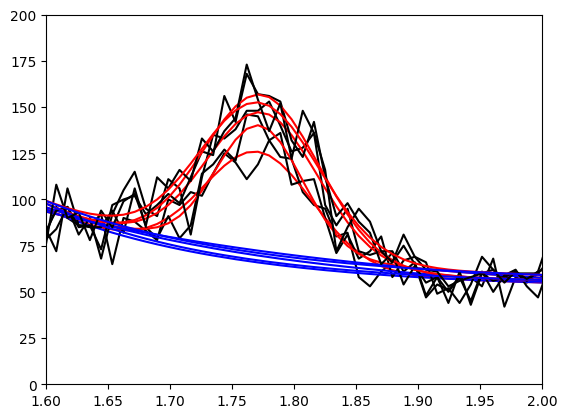

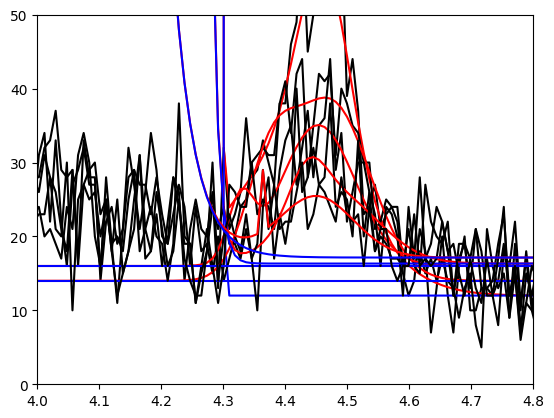

In [13]:
df = Analyzer.toDataFrame()
plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si1']['bins'], df['fits'][i]['Si1']['baseline'], color='blue')
plt.xlim(1.6, 2)
plt.ylim(0, 200)
plt.show()

plt.figure()
for i in range(len(df)):
    plt.plot(df['bins'][i], df['vals'][i], color='black')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['peak'], color='red')
    plt.plot(df['fits'][i]['Si2C1']['bins'], df['fits'][i]['Si2C1']['baseline'], color='blue')
plt.xlim(4.0, 4.8)
plt.ylim(0, 50)
plt.show()


# Calibrate

In [14]:
Analyzer.calibrate(spec_labels, concentrations)

{'methods': {'Si1': 'original', 'Si2C1': 'original'},
 'weights': {'Si1': {'k1': 0.045784411154614194},
  'Si2C1': {'k1': 0.12836087565683063, 'k2': 48.99674990666522}}}

In [15]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib
0,concentration_C_27_Si_3092,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 392.0, 596.0, 566.0, 685.0, 881.0,...","{'Si1': 6.633828335858999, 'Si2C1': 14.1226208...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.3092, 'Si2C1': 0.27}","{'Si1': None, 'Si2C1': None}",True
1,concentration_C_187_Si_3576,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.0, 0.0, 409.0, 572.0, 574.0, 696.0, 917.00...","{'Si1': 5.919151742855648, 'Si2C1': 9.99308943...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.3576, 'Si2C1': 0.187}","{'Si1': None, 'Si2C1': None}",True
2,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.761239601845876, 'Si2C1': 6.42873938...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': None, 'Si2C1': None}",True
3,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000270563175, 'Si2C1': 4.1479372...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': None, 'Si2C1': None}",True
4,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984306624957, 'Si2C1': 2.56126140...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': None, 'Si2C1': None}",True


# Results

In [16]:
Analyzer.applyCalibrationAreas(spec_labels)

[[0.30372592405809845, 0.2710048770814542, 0.40112819615499995, 0.4851774173930223, 0.45262397016258055], [0.27085667635604166, 0.1884472328309045, 0.108254914930218, 0.056895548625102044, 0.026374969887351274]]


{'concentration_C_27_Si_3092': {'Si1': 0.30372592405809845,
  'Si2C1': 0.27085667635604166},
 'concentration_C_187_Si_3576': {'Si1': 0.2710048770814542,
  'Si2C1': 0.1884472328309045},
 'concentration_C_115_Si_3996': {'Si1': 0.40112819615499995,
  'Si2C1': 0.108254914930218},
 'concentration_C_0532_Si_4356': {'Si1': 0.4851774173930223,
  'Si2C1': 0.056895548625102044},
 'concentration_C_0258_Si_4516': {'Si1': 0.45262397016258055,
  'Si2C1': 0.026374969887351274}}

In [17]:
Analyzer.toDataFrame()

,label,bins,vals,areas,fits,true_comp,pred_comp,for_calib
0,concentration_C_27_Si_3092,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 392.0, 596.0, 566.0, 685.0, 881.0,...","{'Si1': 6.633828335858999, 'Si2C1': 14.1226208...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.3092, 'Si2C1': 0.27}","{'Si1': 0.30372592405809845, 'Si2C1': 0.270856...",True
1,concentration_C_187_Si_3576,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[20.0, 0.0, 409.0, 572.0, 574.0, 696.0, 917.00...","{'Si1': 5.919151742855648, 'Si2C1': 9.99308943...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.3576, 'Si2C1': 0.187}","{'Si1': 0.2710048770814542, 'Si2C1': 0.1884472...",True
2,concentration_C_115_Si_3996,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[19.0, 0.0, 384.0, 571.0, 614.0, 635.0, 864.0,...","{'Si1': 8.761239601845876, 'Si2C1': 6.42873938...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.3996, 'Si2C1': 0.115}","{'Si1': 0.40112819615499995, 'Si2C1': 0.108254...",True
3,concentration_C_0532_Si_4356,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[25.000000000000004, 0.0, 387.0, 585.0, 599.0,...","{'Si1': 10.597000270563175, 'Si2C1': 4.1479372...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.4356, 'Si2C1': 0.0532}","{'Si1': 0.4851774173930223, 'Si2C1': 0.0568955...",True
4,concentration_C_0258_Si_4516,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[18.0, 0.0, 407.0, 596.0, 574.0, 681.0, 819.0,...","{'Si1': 9.885984306624957, 'Si2C1': 2.56126140...","{'Si1': {'bins': [0.0, 1e-05, 0.00904482, 0.01...","{'Si1': 0.4516, 'Si2C1': 0.0258}","{'Si1': 0.45262397016258055, 'Si2C1': 0.026374...",True
